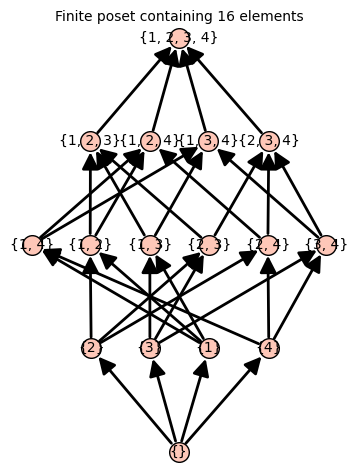

In [8]:
##creating our level poset of the subset relations -- extended boolean posets? 

def level_poset(n):
    elements = Subsets(range(1, n + 1))
    ord = lambda x, y: x.issubset(y)
    level = lambda x: x.size()
    l_poset = Poset((elements,ord), facade=True)
    return l_poset
    
level_poset(4)

In [9]:
##ok, now generate the rhizome count for each level
def elements_in_level(poset, level):
    
    return list(filter(lambda element: len(element) == level, poset))

# print(elements_in_level(level_poset(4), 2))

def calculate_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

def select_next_elm(level, previous):
    if not previous:
        return level[0] if level else None
    
    min_similarity = float('inf')
    next_element = None
    
    for subset in level:
        similarity = min(calculate_similarity(subset, prev_subset) for prev_subset in previous)
        if similarity < min_similarity:
            min_similarity = similarity
            next_element = subset
    
    return next_element
    
    
def rhizome_ct(n):
    poset = level_poset(n)
    rhizomes = []
    rhizome_nums = [1]
    ## --> the count of elms in a level l in a poset of n is n choose l. 
    
    ##dynamic programming can help optimize this if it's too slow here. 
    ##iterate through levels
    for level in range(1, n):
        children_set = set([])
        child_level_size = binomial(n, level + 1)
        elms = elements_in_level(poset, level)
        
    ##iterate through the elms in a level in a greedy way to make more efficient. 
        i = 0
        previous_elms = []
        while len(children_set) < child_level_size and i < n:
            ##select next element smart
            current_elm = select_next_elm(elms, previous_elms)
            
    ##generate their children using lower_covers_iterator()
            children = poset.upper_covers(current_elm)
#             print(current_elm, children)
    ##add to exclusive set that removes duplicates
            children_set.update(children)
#             print("Children set", children_set)
            rhizomes.append(current_elm)
            i+=1
            previous_elms.append(current_elm)
            elms.remove(current_elm)
        rhizome_nums.append(i)
    ##once the children set size is equal to the size of the child level, ct parents
    print(rhizome_nums)
    return(rhizomes)

%time
rhizome_ct(6)


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
[1, 5, 6, 6, 6, 1]


[{1},
 {5},
 {4},
 {2},
 {3},
 {1, 4},
 {2, 3},
 {1, 6},
 {1, 5},
 {2, 6},
 {1, 3},
 {2, 3, 4},
 {1, 5, 6},
 {3, 4, 6},
 {1, 2, 5},
 {3, 4, 5},
 {1, 2, 6},
 {3, 4, 5, 6},
 {1, 2, 3, 4},
 {2, 3, 5, 6},
 {1, 3, 4, 5},
 {2, 3, 4, 6},
 {1, 3, 4, 6},
 {2, 3, 4, 5, 6}]

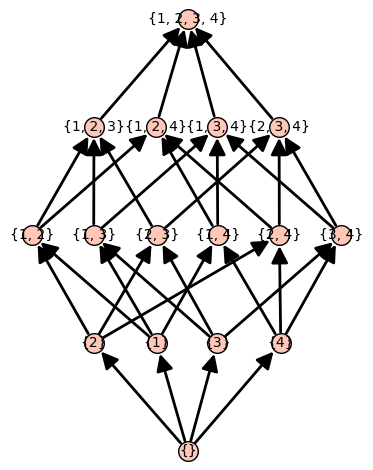

[1, 3, 3, 1]

In [45]:
def elements_in_level(poset, level):
    return list(filter(lambda element: len(element) == level, poset))

def next_elm(dictionary):
    max_key = None
    max_value_count = 0
    
    for key, values in dictionary.items():
        if len(values) > max_value_count:
            max_key = key
            max_value_count = len(values)
    
    return max_key


def rhizome_ct_2(n):
    poset = posets.BooleanLattice(n, use_subsets = true)
#     poset.show()
    
    rhizomes = []
    rhizome_nums = []
    for level in range(0, n):
        level_ct = 0
        elms = elements_in_level(poset, level)
        child_set = set([])
        child_target = elements_in_level(poset, level +1) ##not the most efficient here but it's ok for now
        
        ##construct dictionary of all elms and their children
        child_dict = {}
        for elm in elms:
            children = poset.upper_covers(elm)
            child_dict[elm] = children
        
        ##ok, now construct child set using maximum efficiency parents.
        ##remove from dictionary once checked 
        while child_set != set(child_target):
#             print(list(child_set), child_target)
            next_check = next_elm(child_dict)
#             print("Children of", next_check, ":", child_dict[next_check])
            child_set.update(child_dict[next_check])
            rhizomes.append(next_check)
            level_ct += 1
            del child_dict[next_check]
        rhizome_nums.append(level_ct)
#     return rhizomes
    return rhizome_nums

rhizome_ct_2(4)

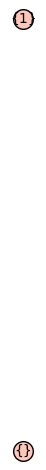

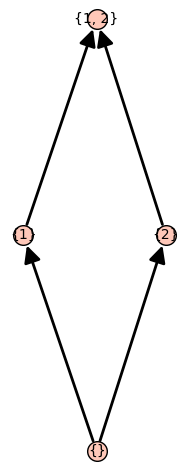

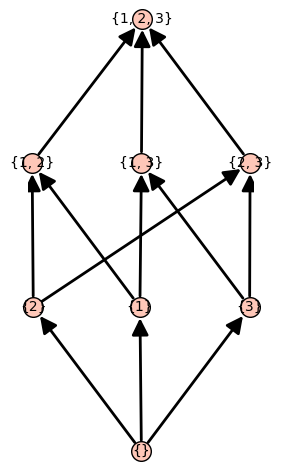

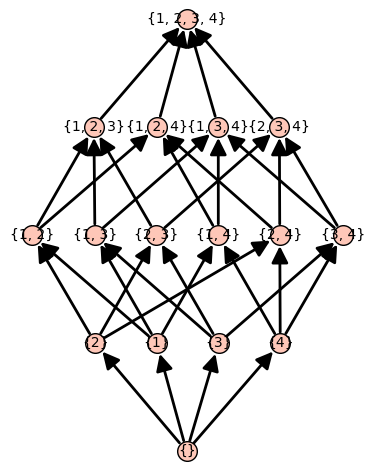

[1] [1, 1] [1, 2, 1] [1, 3, 3, 1]


In [46]:
print(rhizome_ct_2(1),rhizome_ct_2(2),rhizome_ct_2(3),rhizome_ct_2(4))
